# Лабораторная №4
## Задание:

- Выберите набор данных (датасет) для решения задачи классификации или регрессии.
- В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
- С использованием метода train_test_split разделите выборку на обучающую и тестовую.
- Обучите следующие модели:
  - одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
  - SVM;
  - дерево решений.
- Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
- Постройте график, показывающий важность признаков в дереве решений.
- Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

# Importing the dataset in the variable 'df' and assigning the column names as specified above

df = pd.read_csv('/housing.csv', header=None, delimiter=r"\s+", names=column_names)


In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:

def detect_outliers(df):
  cols = list(df)
  outliers = pd.DataFrame(columns=['Feature', 'Number of Outliers'])
  for column in cols:
    if column in df.select_dtypes(include=np.number).columns:
      q1 = df[column].quantile(0.25)
      q3 = df[column].quantile(0.75)
      iqr = q3 - q1
      fence_low = q1 - (1.5*iqr)
      fence_high = q3 + (1.5*iqr)
      outliers = pd.concat([outliers, pd.DataFrame({'Feature': [column], 'Number of Outliers': [df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]]})], ignore_index=True)
  return outliers

detect_outliers(df)

,Feature,Number of Outliers
0,CRIM,66
1,ZN,68
2,INDUS,0
3,CHAS,35
4,NOX,0
5,RM,30
6,AGE,0
7,DIS,5
8,RAD,0
9,TAX,0


In [ ]:
X = df.drop('PRICE', axis = 1)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_predict = reg_all.predict(X_train)

rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')

The model performance for training set
--------------------------------------
RMSE is 4.6520331848801675
R2 score is 0.75


In [ ]:
y_pred = reg_all.predict(X_test)

In [ ]:
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2: {r2}")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.928602182665332
R^2: 0.67


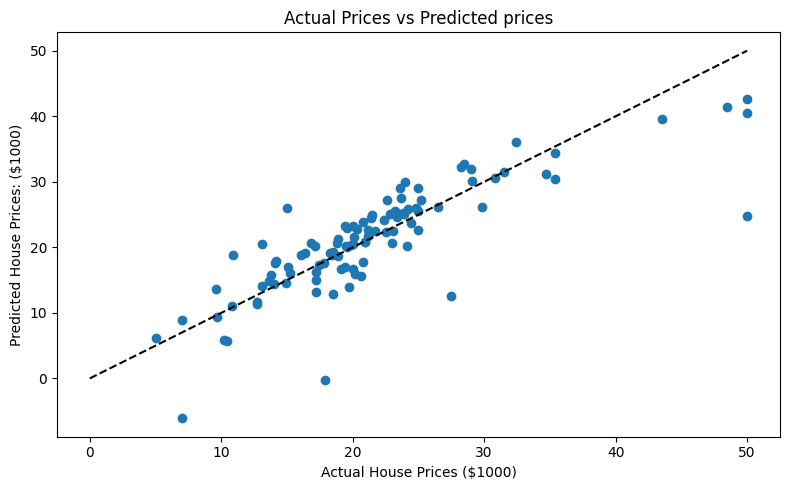

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test, y_pred);
plt.plot([0, 50], [0, 50], '--k');
#plt.axis('tight');
plt.xlabel("Actual House Prices ($1000)");
plt.ylabel("Predicted House Prices: ($1000)");
#plt.xticks(range(0, int(max(y_test)),2));
#plt.yticks(range(0, int(max(y_test)),2));
plt.title("Actual Prices vs Predicted prices");
plt.tight_layout();

In [ ]:
print("RMS: %r " % np.sqrt(np.mean((y_test - y_pred) ** 2)))

RMS: 4.928602182665332 


In [ ]:
dtr = DecisionTreeRegressor()
k_fold  = KFold(n_splits=10, random_state=9, shuffle = True)
results = cross_val_score(dtr, X_train, y_train, cv=k_fold, scoring="neg_mean_squared_error")
print("{:.2f}, {:.2f}".format(round(results.mean(), 3), round(results.std(), 3)))


-24.20, 10.88


In [ ]:
svr = SVR()
k_fold  = KFold(n_splits=10, random_state=9, shuffle = True)
results = cross_val_score(svr, X_train, y_train, cv=k_fold, scoring="neg_mean_squared_error")
print("{:.2f}, {:.2f}".format(round(results.mean(), 3), round(results.std(), 3)))

-71.30, 31.05


In [ ]:
from IPython.core.display import HTML
from sklearn.tree import export_text
model5 = dtr.fit(X_train, y_train)
tree_rules = export_text(model5, feature_names=['Price'])
HTML('<pre>' + tree_rules + '</pre>')

ValueError: feature_names must contain 13 elements, got 1